In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import email

In [2]:
df = pd.read_csv(r"C:\Users\saivi\OneDrive\Desktop\Classes\ALDA\Project\emails.csv", encoding="latin1")
df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [4]:
#Data preperation
def get_email_fields(field_name, messages):
    extracted_fields = []
    
    for i, each_msg in (messages.items()):
        email_obj = email.message_from_string(each_msg)
        extracted_fields.append(email_obj.get(field_name))
       
    return extracted_fields

In [5]:
email_headers = ['Date', 'From', 'To', 'Subject', 'From', 'To', 'Folder', 'Origin', 'Filename']
for header in email_headers:
    df[header] = get_email_fields(header, df['message'])

def extract_employees(file_paths):
    employee_list = []
    for i, path in file_paths.items():
        employee_name = path.split('/')[0]
        employee_list.append(employee_name)
    return employee_list
df['Employee'] = extract_employees(df['file'])

def extract_body(emails):
    email_bodies = []
    for msg in emails.values:
        email_msg = email.message_from_string(msg)
        email_bodies.append(email_msg.get_payload())
 
    return email_bodies

df['Body'] = extract_body(df['message'])

In [6]:
df.head()

,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,None,None,None,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,None,None,None,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,None,None,None,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,None,None,None,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,None,None,None,Let's shoot for Tuesday at 11:45.,allen-p


In [7]:
df.Employee.value_counts()[:20]


Employee
kaminski-v      28465
dasovich-j      28234
kean-s          25351
mann-k          23381
jones-t         19950
shackleton-s    18687
taylor-m        13875
farmer-d        13032
germany-c       12436
beck-s          11830
symes-k         10827
nemec-g         10655
scott-s          8022
rogers-b         8009
bass-e           7823
sanders-r        7329
campbell-l       6490
shapiro-r        6071
guzman-m         6054
lay-k            5937
Name: count, dtype: int64

In [8]:
# Get the top 10 employees
top_employees = df['Employee'].value_counts().head(10).index

# Create a new DataFrame with only the top employees
df_top_employees = df[df['Employee'].isin(top_employees)]
df_top_employees.head()


,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,Employee
20524,beck-s/_sent_mail/1.,Message-ID: <28178233.1075855912627.JavaMail.e...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,Re: Lunch??,None,None,None,Thanks for rounding up the tickets for the Ora...,beck-s
20525,beck-s/_sent_mail/10.,Message-ID: <30397518.1075855912830.JavaMail.e...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",Information in Entelligence vs Global Counterp...,None,None,None,Did Debbie talk with the two of you before put...,beck-s
20526,beck-s/_sent_mail/100.,Message-ID: <9779711.1075855914992.JavaMail.ev...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,Re: ASE,None,None,None,I have attended three ASE's and would be happy...,beck-s
20527,beck-s/_sent_mail/1000.,Message-ID: <20508894.1075856099489.JavaMail.e...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,Topics for next week,None,None,None,"Well, I didn't get this out to you before I le...",beck-s
20528,beck-s/_sent_mail/1001.,Message-ID: <21857164.1075856099514.JavaMail.e...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...","Details of Brainstorming Session - Friday, Jan...",None,None,None,Please see following details for Friday's brai...,beck-s


In [9]:
df_top_employees.Employee.value_counts()[:10]


Employee
kaminski-v      28465
dasovich-j      28234
kean-s          25351
mann-k          23381
jones-t         19950
shackleton-s    18687
taylor-m        13875
farmer-d        13032
germany-c       12436
beck-s          11830
Name: count, dtype: int64

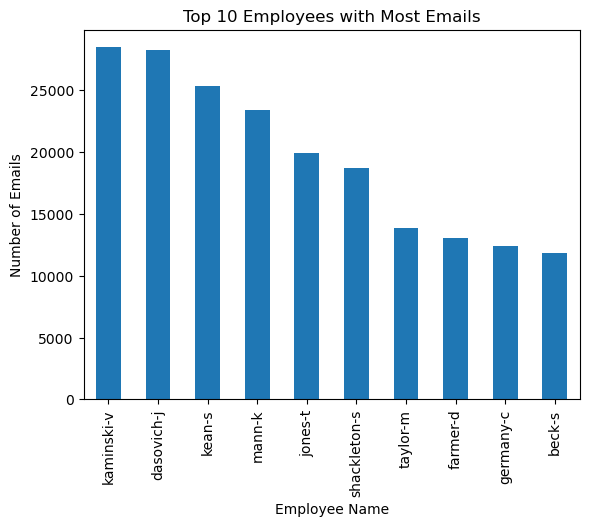

In [77]:
# Calculate number of emails for each employee
email_counts = df['Employee'].value_counts()

# Select top 10 employees with most emails
top_10 = email_counts.nlargest(10)

# Plot bar graph
top_10.plot(kind='bar')
plt.xlabel('Employee Name')
plt.ylabel('Number of Emails')
plt.title('Top 10 Employees with Most Emails')
plt.show()

In [10]:
#Data Preprocessing
#Lowercasing all the text data present in Subject and Body so that it becomes easier for the model
# Create a new DataFrame with only the top employees
df_top_employees = df[df['Employee'].isin(top_employees)].copy()

# Now you can modify df_top_employees without warnings
df_top_employees['Subject'] = df_top_employees['Subject'].apply(lambda x: str(x).lower())
df_top_employees['message'] = df_top_employees['message'].apply(lambda x: str(x).lower())


In [11]:
#Remove punctuations
import re
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)


df_top_employees['Subject'] = df_top_employees['Subject'].apply(lambda x: remove_punctuation(x))
df_top_employees['message'] = df_top_employees['message'].apply(lambda x: remove_punctuation(x))



In [12]:
#removing stop words and also added the list of most non releveant occuring words to the stopwords list
import nltk
from nltk.corpus import stopwords

list_of_stop_words = set(stopwords.words('english'))

custom_stop_words = ['subject', 'xfolder', 'xfrom','xfilenam','xto','xcc','xorigin','xbcc','cc','email']
list_of_stop_words.update(custom_stop_words)

def removing_stopwords(text):
        return ' '.join([item for item in str(text).split() if item not in list_of_stop_words])

df_top_employees['Subject'] = df_top_employees['Subject'].apply(lambda x: removing_stopwords(x))
df_top_employees['message'] = df_top_employees['message'].apply(lambda x: removing_stopwords(x))




In [13]:
#performing stemming so that it brings the word back to its root
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df_top_employees['Subject'] = df_top_employees['Subject'].apply(lambda x: stemming(x))
df_top_employees['message'] = df_top_employees['message'].apply(lambda x: stemming(x))

In [14]:
# Performing sentiment analysis using textblob
from textblob import TextBlob
def sentiment_analysis_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
    
df_top_employees["textblob_score"] = df_top_employees["message"].apply(sentiment_analysis_textblob)
df_top_employees.head()

,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,Employee,textblob_score
20524,beck-s/_sent_mail/1.,messageid 281782331075855912627javamailevansth...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,lunch,None,None,None,Thanks for rounding up the tickets for the Ora...,beck-s,0.239669
20525,beck-s/_sent_mail/10.,messageid 303975181075855912830javamailevansth...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",inform entellig vs global counterparti,None,None,None,Did Debbie talk with the two of you before put...,beck-s,0.013542
20526,beck-s/_sent_mail/100.,messageid 97797111075855914992javamailevansthy...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,ase,None,None,None,I have attended three ASE's and would be happy...,beck-s,0.300000
20527,beck-s/_sent_mail/1000.,messageid 205088941075856099489javamailevansth...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,topic next week,None,None,None,"Well, I didn't get this out to you before I le...",beck-s,0.025000
20528,beck-s/_sent_mail/1001.,messageid 218571641075856099514javamailevansth...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...",detail brainstorm session friday januari 12,None,None,None,Please see following details for Friday's brai...,beck-s,0.095238


In [15]:
#categorizing the sentimental analysis based on the polarity scores
def text_blob_labelling(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'neutral'

df_top_employees["textblob_label"] = df_top_employees["textblob_score"].apply(text_blob_labelling)

df_top_employees.head()

,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,Employee,textblob_score,textblob_label
20524,beck-s/_sent_mail/1.,messageid 281782331075855912627javamailevansth...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,lunch,None,None,None,Thanks for rounding up the tickets for the Ora...,beck-s,0.239669,positive
20525,beck-s/_sent_mail/10.,messageid 303975181075855912830javamailevansth...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",inform entellig vs global counterparti,None,None,None,Did Debbie talk with the two of you before put...,beck-s,0.013542,positive
20526,beck-s/_sent_mail/100.,messageid 97797111075855914992javamailevansthy...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,ase,None,None,None,I have attended three ASE's and would be happy...,beck-s,0.300000,positive
20527,beck-s/_sent_mail/1000.,messageid 205088941075856099489javamailevansth...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,topic next week,None,None,None,"Well, I didn't get this out to you before I le...",beck-s,0.025000,positive
20528,beck-s/_sent_mail/1001.,messageid 218571641075856099514javamailevansth...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...",detail brainstorm session friday januari 12,None,None,None,Please see following details for Friday's brai...,beck-s,0.095238,positive


In [16]:
#performing sentiment analysis using vadersentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()
def sentiment_analysis_vader(text):
    values = vader_analyzer.polarity_scores(text)
    return values['compound']
    
df_top_employees["vader_sentiment_analysis_score"] = df_top_employees["message"].apply(sentiment_analysis_vader)

In [17]:
#categorizing the sentimental analysis based on the polarity scores
def vader_sentiment_labelling(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'neutral'

df_top_employees["vader_sentiment_analysis_labelling"] = df_top_employees["vader_sentiment_analysis_score"].apply(vader_sentiment_labelling)
df_top_employees.head()


,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,Employee,textblob_score,textblob_label,vader_sentiment_analysis_score,vader_sentiment_analysis_labelling
20524,beck-s/_sent_mail/1.,messageid 281782331075855912627javamailevansth...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,lunch,None,None,None,Thanks for rounding up the tickets for the Ora...,beck-s,0.239669,positive,0.9888,positive
20525,beck-s/_sent_mail/10.,messageid 303975181075855912830javamailevansth...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",inform entellig vs global counterparti,None,None,None,Did Debbie talk with the two of you before put...,beck-s,0.013542,positive,0.4749,positive
20526,beck-s/_sent_mail/100.,messageid 97797111075855914992javamailevansthy...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,ase,None,None,None,I have attended three ASE's and would be happy...,beck-s,0.300000,positive,0.6808,positive
20527,beck-s/_sent_mail/1000.,messageid 205088941075856099489javamailevansth...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,topic next week,None,None,None,"Well, I didn't get this out to you before I le...",beck-s,0.025000,positive,0.8807,positive
20528,beck-s/_sent_mail/1001.,messageid 218571641075856099514javamailevansth...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...",detail brainstorm session friday januari 12,None,None,None,Please see following details for Friday's brai...,beck-s,0.095238,positive,0.7003,positive


<Axes: ylabel='count'>

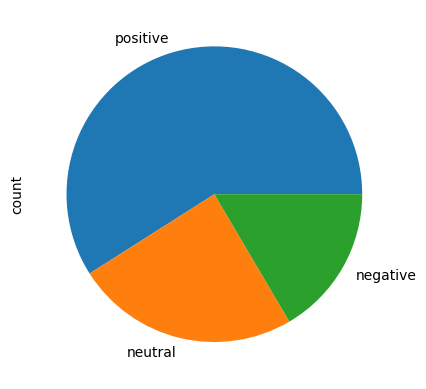

In [18]:
df_top_employees.textblob_label.value_counts().plot(kind='pie')


<Axes: ylabel='count'>

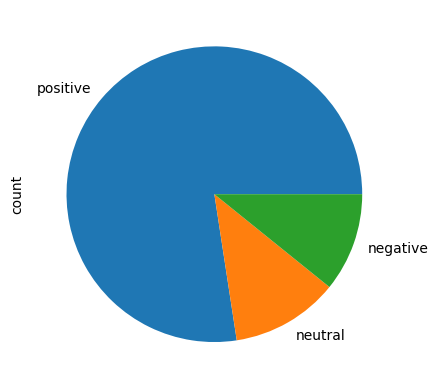

In [19]:
df_top_employees.vader_sentiment_analysis_labelling.value_counts().plot(kind='pie')


In [20]:
df_top_employees.head()

,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,Employee,textblob_score,textblob_label,vader_sentiment_analysis_score,vader_sentiment_analysis_labelling
20524,beck-s/_sent_mail/1.,messageid 281782331075855912627javamailevansth...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,lunch,None,None,None,Thanks for rounding up the tickets for the Ora...,beck-s,0.239669,positive,0.9888,positive
20525,beck-s/_sent_mail/10.,messageid 303975181075855912830javamailevansth...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",inform entellig vs global counterparti,None,None,None,Did Debbie talk with the two of you before put...,beck-s,0.013542,positive,0.4749,positive
20526,beck-s/_sent_mail/100.,messageid 97797111075855914992javamailevansthy...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,ase,None,None,None,I have attended three ASE's and would be happy...,beck-s,0.300000,positive,0.6808,positive
20527,beck-s/_sent_mail/1000.,messageid 205088941075856099489javamailevansth...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,topic next week,None,None,None,"Well, I didn't get this out to you before I le...",beck-s,0.025000,positive,0.8807,positive
20528,beck-s/_sent_mail/1001.,messageid 218571641075856099514javamailevansth...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...",detail brainstorm session friday januari 12,None,None,None,Please see following details for Friday's brai...,beck-s,0.095238,positive,0.7003,positive


In [21]:
#considering more features to train the model
# Define a function to count paragraphs
def count_paragraphs(message):
    return message.count('\n\n') + 1

# Create a new 'Paragraphs' column
df_top_employees['Paragraphs'] = df_top_employees['message'].apply(count_paragraphs)

# Create a new 'Sentences' column
df_top_employees['Sentences'] = df_top_employees['message'].str.count('\. ') + 1


In [22]:
#To find the number of words present in each message
df_top_employees['word_count'] = df_top_employees['message'].apply(lambda x: len(str(x).split()))

In [23]:
#performing labelencoding to convert catrgorical values of employees to numerical representation
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Names' column
df_top_employees['Names_encoded'] = le.fit_transform(df_top_employees['Employee'])


c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [24]:
df_top_employees.head()

,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,Employee,textblob_score,textblob_label,vader_sentiment_analysis_score,vader_sentiment_analysis_labelling,Paragraphs,Sentences,word_count,Names_encoded
20524,beck-s/_sent_mail/1.,messageid 281782331075855912627javamailevansth...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,lunch,None,None,None,Thanks for rounding up the tickets for the Ora...,beck-s,0.239669,positive,0.9888,positive,1,1,205,0
20525,beck-s/_sent_mail/10.,messageid 303975181075855912830javamailevansth...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",inform entellig vs global counterparti,None,None,None,Did Debbie talk with the two of you before put...,beck-s,0.013542,positive,0.4749,positive,1,1,188,0
20526,beck-s/_sent_mail/100.,messageid 97797111075855914992javamailevansthy...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,ase,None,None,None,I have attended three ASE's and would be happy...,beck-s,0.300000,positive,0.6808,positive,1,1,109,0
20527,beck-s/_sent_mail/1000.,messageid 205088941075856099489javamailevansth...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,topic next week,None,None,None,"Well, I didn't get this out to you before I le...",beck-s,0.025000,positive,0.8807,positive,1,1,174,0
20528,beck-s/_sent_mail/1001.,messageid 218571641075856099514javamailevansth...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...",detail brainstorm session friday januari 12,None,None,None,Please see following details for Friday's brai...,beck-s,0.095238,positive,0.7003,positive,1,1,153,0


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'Message' column
X = vectorizer.fit_transform(df_top_employees['message'])

# Convert the result to a DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Limit the features to the top 1000 most frequent words

# Fit and transform the 'message' column
X = vectorizer.fit_transform(df_top_employees['message'])

df_top_employees['countvectorizer_sum'] = X.sum(axis=1)

In [40]:
df_tfidf

,00,000,01,0107,02,020,02282001,03,03072001,03142001,...,your,youv,yvett,zdunkewicz,zero,zimin,ziminluenroncom,zipper,zisman,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Calculate the sum of TF-IDF values for each message
tfidf_sum = df_tfidf.sum(axis=1)

# Add the sums as a new column in df_top_employees
df_top_employees['tfidf_sum'] = tfidf_sum

In [28]:
df_top_employees.head()

,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,...,textblob_score,textblob_label,vader_sentiment_analysis_score,vader_sentiment_analysis_labelling,Paragraphs,Sentences,word_count,Names_encoded,countvectorizer_sum,tfidf_sum
20524,beck-s/_sent_mail/1.,messageid 281782331075855912627javamailevansth...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,lunch,None,None,None,Thanks for rounding up the tickets for the Ora...,...,0.239669,positive,0.9888,positive,1,1,205,0,167,6.569282
20525,beck-s/_sent_mail/10.,messageid 303975181075855912830javamailevansth...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",inform entellig vs global counterparti,None,None,None,Did Debbie talk with the two of you before put...,...,0.013542,positive,0.4749,positive,1,1,188,0,159,7.642355
20526,beck-s/_sent_mail/100.,messageid 97797111075855914992javamailevansthy...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,ase,None,None,None,I have attended three ASE's and would be happy...,...,0.300000,positive,0.6808,positive,1,1,109,0,91,4.170119
20527,beck-s/_sent_mail/1000.,messageid 205088941075856099489javamailevansth...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,topic next week,None,None,None,"Well, I didn't get this out to you before I le...",...,0.025000,positive,0.8807,positive,1,1,174,0,162,7.262711
20528,beck-s/_sent_mail/1001.,messageid 218571641075856099514javamailevansth...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...",detail brainstorm session friday januari 12,None,None,None,Please see following details for Friday's brai...,...,0.095238,positive,0.7003,positive,1,1,153,0,103,11.777769


In [29]:
df_features = df_top_employees[['textblob_score','vader_sentiment_analysis_score','Paragraphs','Sentences','word_count','tfidf_sum']]
df_features1 = df_top_employees[['textblob_score','vader_sentiment_analysis_score','Paragraphs','Sentences','word_count','countvectorizer_sum']]


In [30]:
#performing MinMaxScalar on all the columns
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled1 = scaler.fit_transform(df_features1)

# Convert the result back to a DataFrame
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled1 = pd.DataFrame(df_features_scaled1, columns=df_features1.columns)


df_top_employees['sender_name_encoded_scaled'] = scaler.fit_transform(df_top_employees[['Names_encoded']])
df_top_employees.head()

c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

,file,message,Date,From,To,Subject,Folder,Origin,Filename,Body,...,textblob_label,vader_sentiment_analysis_score,vader_sentiment_analysis_labelling,Paragraphs,Sentences,word_count,Names_encoded,countvectorizer_sum,tfidf_sum,sender_name_encoded_scaled
20524,beck-s/_sent_mail/1.,messageid 281782331075855912627javamailevansth...,"Tue, 12 Dec 2000 09:34:00 -0800 (PST)",sally.beck@enron.com,tjacobs@ou.edu,lunch,None,None,None,Thanks for rounding up the tickets for the Ora...,...,positive,0.9888,positive,1,1,205,0,167,6.569282,0.0
20525,beck-s/_sent_mail/10.,messageid 303975181075855912830javamailevansth...,"Mon, 11 Dec 2000 05:27:00 -0800 (PST)",sally.beck@enron.com,"mary.solmonson@enron.com, james.scribner@enron...",inform entellig vs global counterparti,None,None,None,Did Debbie talk with the two of you before put...,...,positive,0.4749,positive,1,1,188,0,159,7.642355,0.0
20526,beck-s/_sent_mail/100.,messageid 97797111075855914992javamailevansthy...,"Mon, 6 Nov 2000 05:16:00 -0800 (PST)",sally.beck@enron.com,tim.o'rourke@enron.com,ase,None,None,None,I have attended three ASE's and would be happy...,...,positive,0.6808,positive,1,1,109,0,91,4.170119,0.0
20527,beck-s/_sent_mail/1000.,messageid 205088941075856099489javamailevansth...,"Thu, 11 Jan 2001 03:57:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,topic next week,None,None,None,"Well, I didn't get this out to you before I le...",...,positive,0.8807,positive,1,1,174,0,162,7.262711,0.0
20528,beck-s/_sent_mail/1001.,messageid 218571641075856099514javamailevansth...,"Thu, 11 Jan 2001 02:03:00 -0800 (PST)",patti.thompson@enron.com,"brent.price@enron.com, kevin.sweeney@enron.com...",detail brainstorm session friday januari 12,None,None,None,Please see following details for Friday's brai...,...,positive,0.7003,positive,1,1,153,0,103,11.777769,0.0


c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Average accuracy for df_features: 0.9578109804643734
Average accuracy for df_features1: 0.9561105714205518


c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


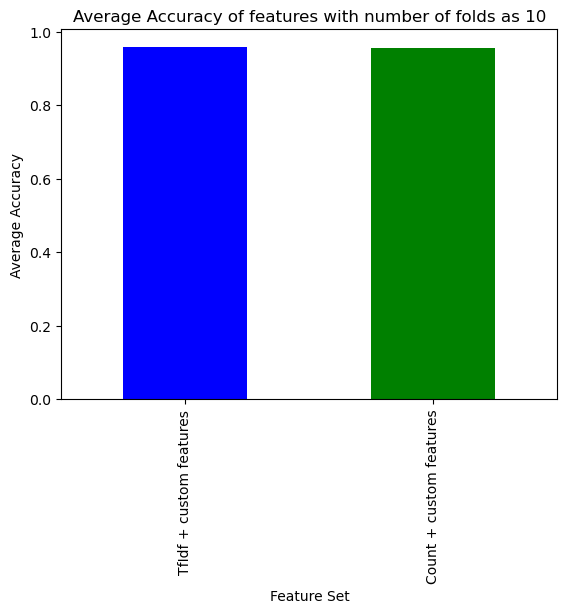

In [63]:
#training of RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Split data into features and target
X1 = df_features.fillna(0) - df_features.min().min()
X2 = df_features1.fillna(0) - df_features1.min().min()
y = df_top_employees['sender_name_encoded_scaled'].astype('int')

# Initialize model
model = RandomForestClassifier()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Store accuracy scores
scores = {"df_features": [], "df_features1": []}

# Perform cross-validation with 10 folds on df_features
for train_index, test_index in skf.split(X1, y):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores["df_features"].append(score)

# Perform cross-validation with 10 folds on df_features1
for train_index, test_index in skf.split(X2, y):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores["df_features1"].append(score)

# Convert scores to DataFrame
df_scores = pd.DataFrame(scores)

# Rename columns
df_scores.columns = ['TfIdf + custom features', 'CountVec + custom features']

# Calculate average accuracies
avg_scores = df_scores.mean()

# Print average accuracies
print(f"Average accuracy for df_features: {avg_scores['TfIdf + custom features']}")
print(f"Average accuracy for df_features1: {avg_scores['CountVec + custom features']}")

# Plot average accuracies
avg_scores.plot(kind='bar',color=['blue', 'green'])
plt.xlabel('Feature Set')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of features with number of folds as 10')
plt.show()


c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Average accuracy for df_features: 0.8401202687994761
Average accuracy for df_features1: 0.9279044868379597


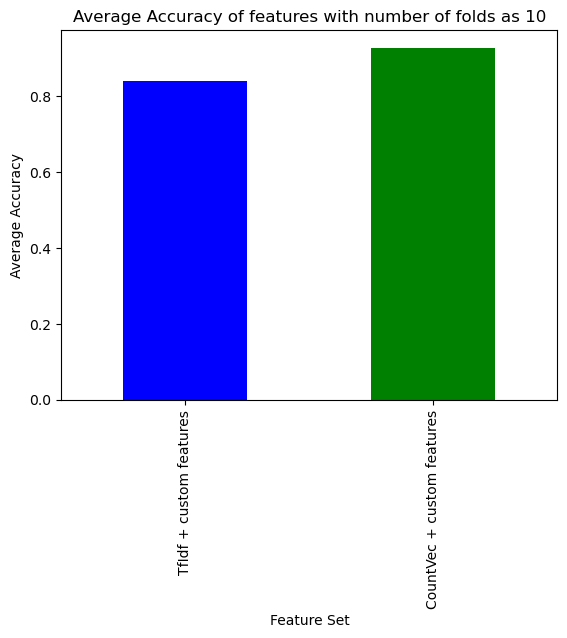

In [74]:
#training of Multinomial Naive Bayes model
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Split data into features and target
X1 = df_features.fillna(0) - df_features.min().min()
X2 = df_features1.fillna(0) - df_features1.min().min()
y = df_top_employees['sender_name_encoded_scaled'].astype('int')

# Initialize model
model = MultinomialNB()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Store accuracy scores
scores = {"df_features": [], "df_features1": []}

# Perform cross-validation with 10 folds on df_features
for train_index, test_index in skf.split(X1, y):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores["df_features"].append(score)

# Perform cross-validation with 10 folds on df_features1
for train_index, test_index in skf.split(X2, y):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores["df_features1"].append(score)

# Convert scores to DataFrame
df_scores = pd.DataFrame(scores)

# Rename columns
df_scores.columns = ['TfIdf + custom features', 'CountVec + custom features']

# Calculate average accuracies
avg_scores = df_scores.mean()

# Print average accuracies
print(f"Average accuracy for df_features: {avg_scores['TfIdf + custom features']}")
print(f"Average accuracy for df_features1: {avg_scores['CountVec + custom features']}")

# Plot average accuracies
avg_scores.plot(kind='bar',color=['blue', 'green'])
plt.xlabel('Feature Set')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of features with number of folds as 10')
plt.show()


c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Average accuracy for df_features: 0.8434648181128266
Average accuracy for df_features1: 0.9289186185635538


c:\Users\saivi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-pack

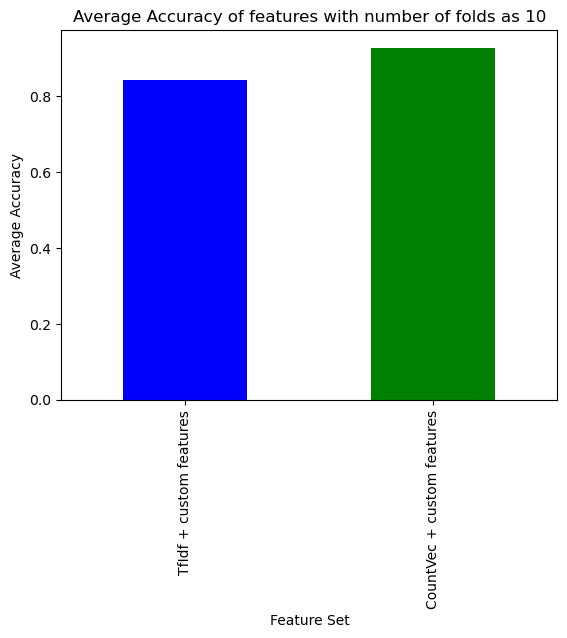

In [75]:
#training of LinearSVC model
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Split data into features and target
X1 = df_features.fillna(0) - df_features.min().min()
X2 = df_features1.fillna(0) - df_features1.min().min()
y = df_top_employees['sender_name_encoded_scaled'].astype('int')

# Initialize model
model = LinearSVC()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Store accuracy scores
scores = {"df_features": [], "df_features1": []}

# Perform cross-validation with 10 folds on df_features
for train_index, test_index in skf.split(X1, y):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores["df_features"].append(score)

# Perform cross-validation with 10 folds on df_features1
for train_index, test_index in skf.split(X2, y):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores["df_features1"].append(score)

# Convert scores to DataFrame
df_scores = pd.DataFrame(scores)

# Rename columns
df_scores.columns = ['TfIdf + custom features', 'CountVec + custom features']

# Calculate average accuracies
avg_scores = df_scores.mean()

# Print average accuracies
print(f"Average accuracy for df_features: {avg_scores['TfIdf + custom features']}")
print(f"Average accuracy for df_features1: {avg_scores['CountVec + custom features']}")

# Plot average accuracies
avg_scores.plot(kind='bar',color=['blue', 'green'])
plt.xlabel('Feature Set')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of features with number of folds as 10')
plt.show()

In [39]:
#making the data useful for passing into LSTM model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Maximum number of words to keep based on word frequency
max_words = 10000

# Maximum length of a sequence
max_len = 500

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_top_employees['message'])
sequences = tokenizer.texts_to_sequences(df_top_employees['message'])

# Pad the sequences
data = pad_sequences(sequences, maxlen=max_len)

# Encode the labels
le = LabelEncoder()
labels = le.fit_transform(df_top_employees['Employee'])
labels = to_categorical(labels)

c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\saivi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [40]:
#training LSTM model
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(labels.shape[1], activation='softmax'))
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test set accuracy: {accuracy * 100}%')


Epoch 1/10
977/977 [==============================] - 135s 136ms/step - loss: 1.2183 - accuracy: 0.5088 - val_loss: 0.5432 - val_accuracy: 0.8465
Epoch 2/10
977/977 [==============================] - 143s 146ms/step - loss: 0.3847 - accuracy: 0.9110 - val_loss: 0.1814 - val_accuracy: 0.9620
Epoch 3/10
977/977 [==============================] - 152s 155ms/step - loss: 0.2249 - accuracy: 0.9594 - val_loss: 0.1534 - val_accuracy: 0.9634
Epoch 4/10
977/977 [==============================] - 151s 154ms/step - loss: 0.1650 - accuracy: 0.9688 - val_loss: 0.1272 - val_accuracy: 0.9691
Epoch 5/10
977/977 [==============================] - 152s 155ms/step - loss: 0.1560 - accuracy: 0.9698 - val_loss: 0.1107 - val_accuracy: 0.9724
Epoch 6/10
977/977 [==============================] - 127s 130ms/step - loss: 0.1367 - accuracy: 0.9730 - val_loss: 0.1100 - val_accuracy: 0.9723
Epoch 7/10
977/977 [==============================] - 123s 126ms/step - loss: 0.1240 - accuracy: 0.9735 - val_loss: 0.1104 -

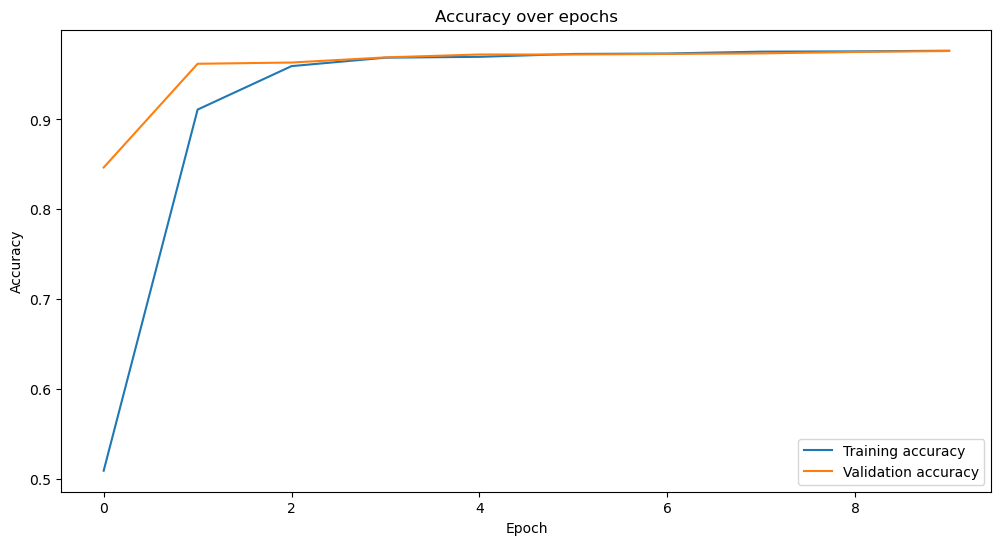

In [41]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1221/1221 [==============================] - 29s 24ms/step


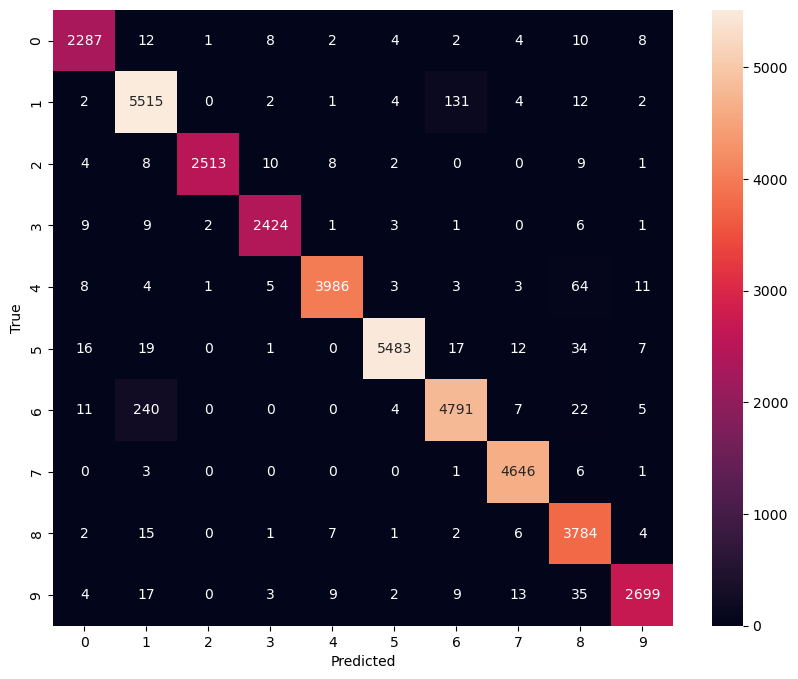

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()